<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

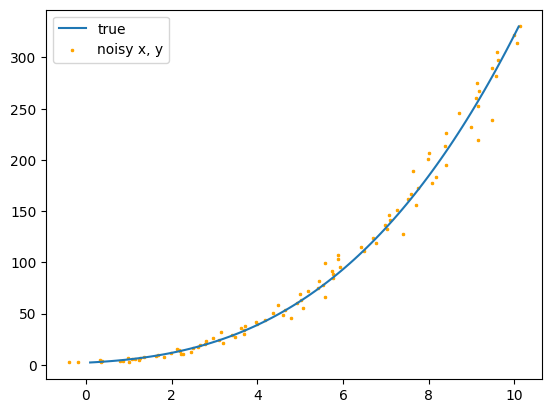

In [52]:
import numpy as np
x = np.linspace(0.1,10.1,100)
y = 0.2*x**3+ 1*x**2 + 2*x + 2

xn = x + np.random.normal(0,0.25, 100)
yn = y + np.random.normal(0,0.05, 100)

import matplotlib.pyplot as plt
plt.plot(x,y, label = 'true')
plt.scatter(xn,yn, 3, 'orange', marker = 'x', label = 'noisy x, y')
plt.legend()

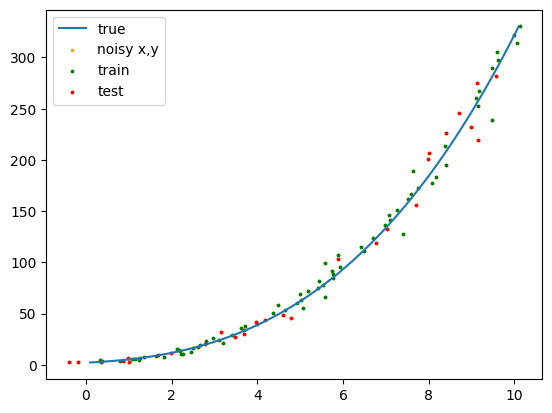

In [53]:
# split
xyn = np.column_stack((xn,yn)) # concat
np.random.shuffle(xyn) # shuffle
train = xyn[0:70,:]
test = xyn[70:,:]

# check
plt.plot(x,y, label = 'true')
plt.scatter(xn,yn, 3, 'orange', marker = 'x', label = 'noisy x,y')
plt.scatter(train[:,0],train[:,1], 3, 'green', marker = 'o', label = 'train')
plt.scatter(test[:,0], test[:,1], 3, 'red', marker = 'o', label = 'test')
plt.legend()

In [54]:
# disassemble matrices into vectors
train_x = train[:,0]
train_y = train[:,1]
test_x  = test[:,0]
test_y  = test[:,1]

In [55]:
# First, import PolynomialFeatures:
from sklearn.preprocessing import PolynomialFeatures

# Then save an instance of PolynomialFeatures with the following settings:
poly = PolynomialFeatures(degree=3, include_bias=False)
# include_bias=False should be set to False, because we’ll use PolynomialFeatures
# together with LinearRegression() later on.

There’s only one method – fit_transform() – but in fact it’s an amalgam of two separate methods: fit() and transform(). fit_transform() is a shortcut for using both at the same time, because they’re often used together.


In [56]:
# With fit() we basically just declare what feature we want to transform:
poly.fit(train_x.reshape(-1,1))

# transform() performs the actual transformation:
poly.transform(train_x.reshape(-1,1))
# in shape of : y = ß_0 + ß_1 x + ß_2 x^2

array([[9.17712650e+00, 8.42196508e+01, 7.72894390e+02],
       [5.05947434e+00, 2.55982806e+01, 1.29513844e+02],
       [5.44588962e+00, 2.96577138e+01, 1.61512636e+02],
       [7.07754205e+00, 5.00916015e+01, 3.54525416e+02],
       [6.42792843e+00, 4.13182639e+01, 2.65590843e+02],
       [2.46226971e+00, 6.06277213e+00, 1.49281802e+01],
       [7.41150172e+00, 5.49303578e+01, 4.07116441e+02],
       [3.61629250e+00, 1.30775715e+01, 4.72923236e+01],
       [7.51702849e+00, 5.65057173e+01, 4.24755086e+02],
       [3.41885442e+00, 1.16885655e+01, 3.99615038e+01],
       [9.47808907e+00, 8.98341724e+01, 8.51456288e+02],
       [3.39456645e-01, 1.15230814e-01, 3.91158653e-02],
       [4.49168642e+00, 2.01752469e+01, 9.06208828e+01],
       [9.61633978e+00, 9.24739907e+01, 8.89261316e+02],
       [5.18269371e+00, 2.68603141e+01, 1.39208781e+02],
       [8.06636342e+00, 6.50662188e+01, 5.24847767e+02],
       [2.26725991e+00, 5.14046752e+00, 1.16547759e+01],
       [2.21898910e+00, 4.92391

In [57]:
# We save the result to poly_features
poly_features = poly.fit_transform(x.reshape(-1,1))  # train_x --> x

# polynomial regression is a linear model,
from sklearn.linear_model import LinearRegression

# save an instance of LinearRegression to a variable
poly_reg_model = LinearRegression()

# fit our model to our data
poly_reg_model.fit(poly_features, y) # train_y --> y

#display model coefficients
print(poly_reg_model.intercept_, poly_reg_model.coef_)

# predict the responses (y_predicted) based on poly_features, and the coefficients it had estimated:
y_predicted = poly_reg_model.predict(poly_features)

1.9999999999999716 [2.  1.  0.2]


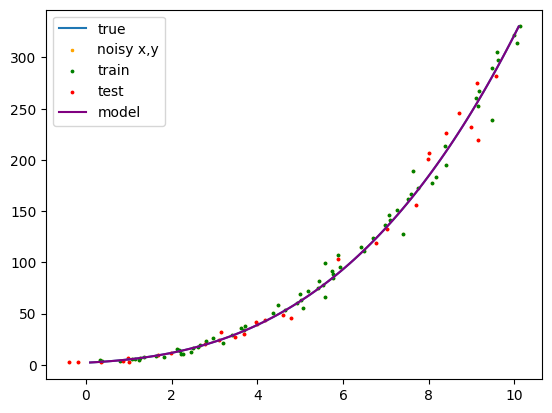

In [59]:
# check
plt.plot(x,y, label = 'true')
plt.scatter(xn,yn, 3, 'orange', marker = 'x', label = 'noisy x,y')
plt.scatter(train[:,0],train[:,1], 3, 'green', marker = 'o', label = 'train')
plt.scatter(test[:,0],test[:,1], 3, 'red', marker = 'o', label = 'test')

#add line to show fitted polynomial regression model
# plt.scatter(train_x, y_predicted, color='purple', label= 'model')  # train_x --> x
plt.plot(x, y_predicted, color='purple', label= 'model')  # train_x --> x

plt.legend()

source: https://data36.com/polynomial-regression-python-scikit-learn/